In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
### Hello Nahid,good job man!

In [2]:
train1 = pd.read_csv("income_evaluation.csv")

In [3]:
train1.head(10)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
train = train1.copy()

In [5]:
import missingno as msno

<Axes: >

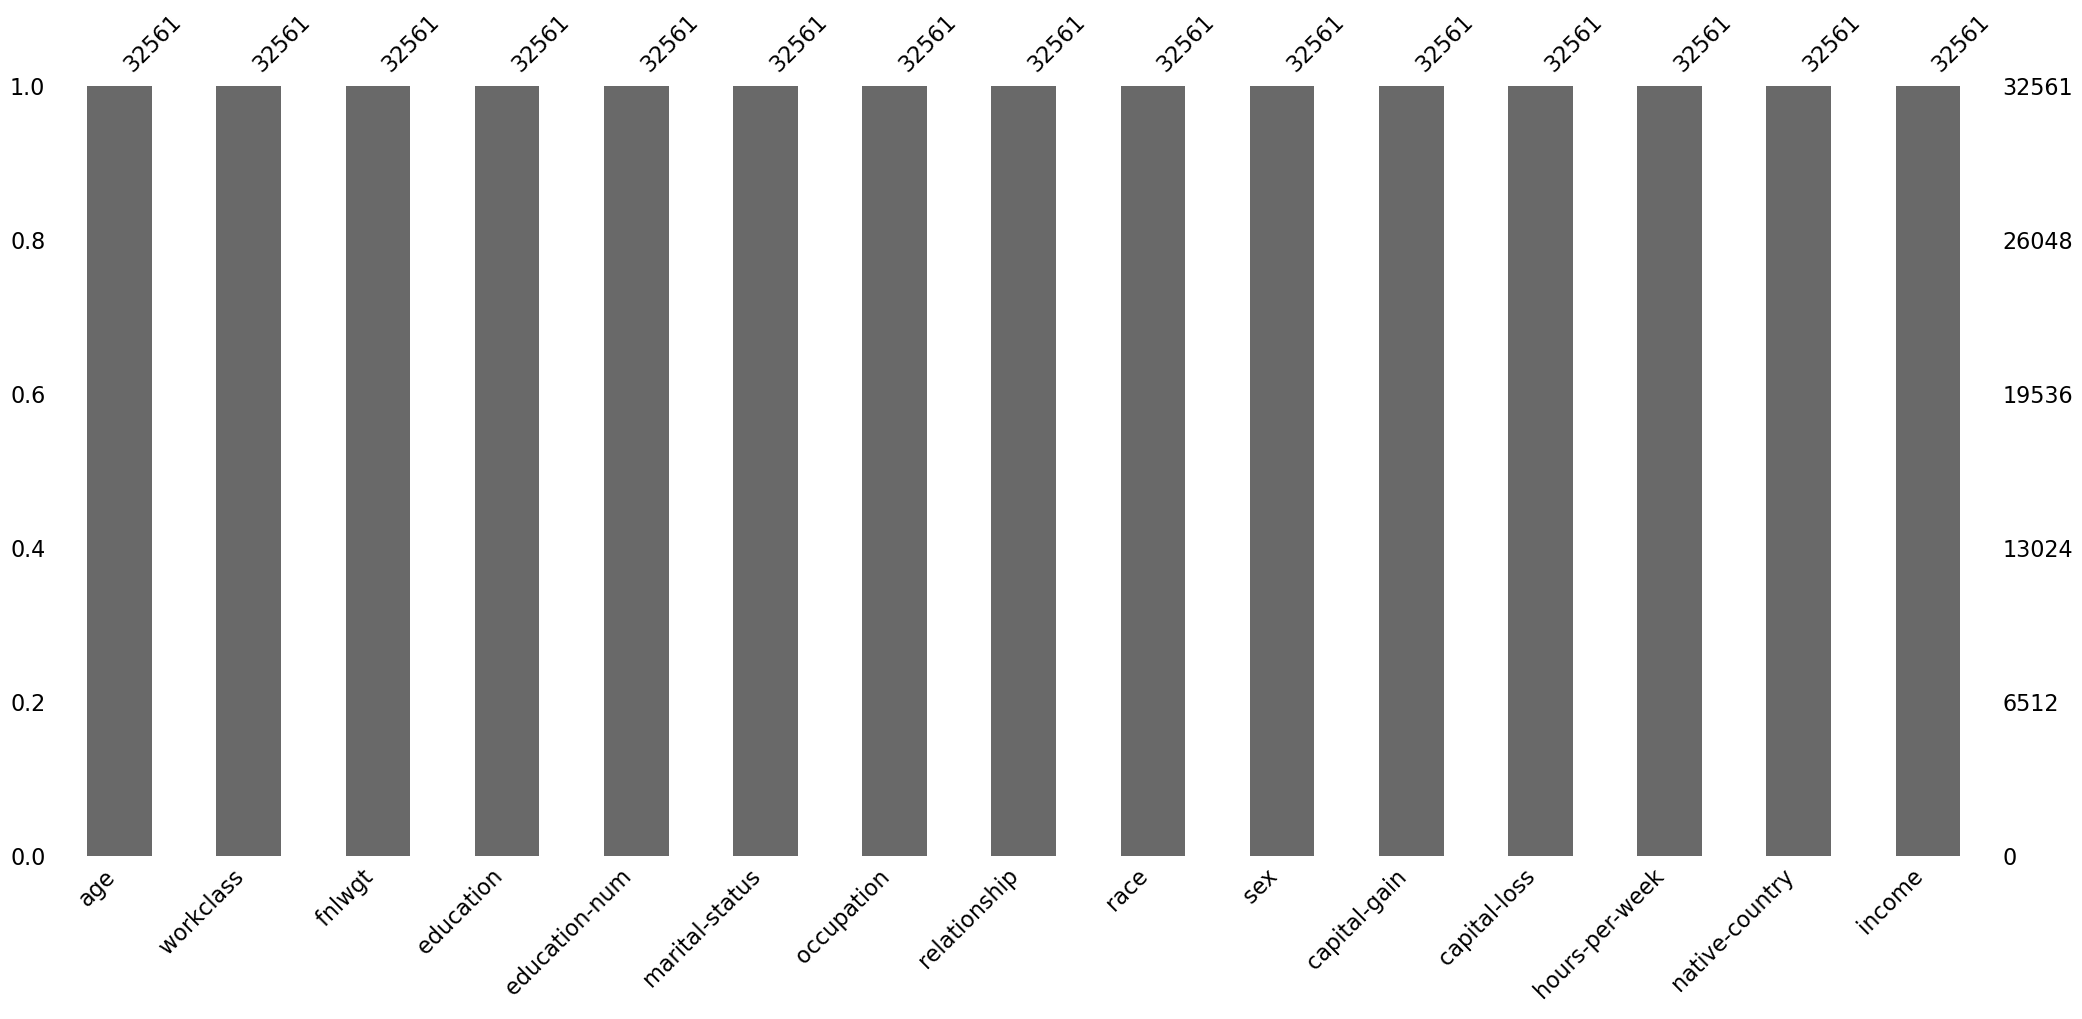

In [6]:
msno.bar(train)

In [7]:
train.duplicated().sum()

24

In [8]:
train = train.drop_duplicates()

In [9]:
train.drop(" education", axis=1, inplace=True)


In [10]:
train.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [11]:
train.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [12]:
train.drop(" fnlwgt", axis=1, inplace=True)

In [13]:
train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


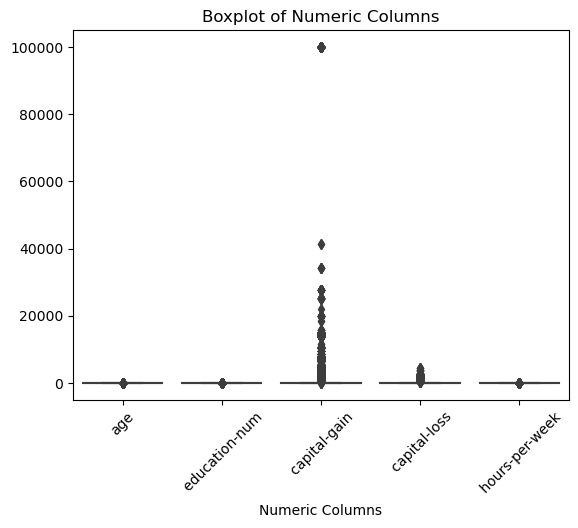

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tüm numeric sütunlar için boxplot çizimi
sns.boxplot(data=train.select_dtypes(include='number'))

# Grafiği görsel olarak daha iyi hale getirebilirsiniz
plt.xticks(rotation=45)  # Sütun adlarının eğik yazılmasını sağlar
plt.xlabel('Numeric Columns')
plt.title('Boxplot of Numeric Columns')
plt.show()


In [15]:
train.head(3)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [16]:
train.drop(" capital-loss" ,axis=1, inplace=True)

In [17]:
train.drop(" race" ,axis=1, inplace=True)

In [18]:
train.nunique()

age                 73
 workclass           9
 education-num      16
 marital-status      7
 occupation         15
 relationship        6
 sex                 2
 capital-gain      119
 hours-per-week     94
 native-country     42
 income              2
dtype: int64

In [19]:
train.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,sex,capital-gain,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,Female,14084,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,40,United-States,>50K


In [20]:
categorical_columns = [' workclass', " occupation", " relationship", " sex"]
train = pd.get_dummies(train, columns=categorical_columns)


In [21]:
print(train.columns)


Index(['age', ' education-num', ' marital-status', ' capital-gain',
       ' hours-per-week', ' native-country', ' income', ' workclass_ ?',
       ' workclass_ Federal-gov', ' workclass_ Local-gov',
       ' workclass_ Never-worked', ' workclass_ Private',
       ' workclass_ Self-emp-inc', ' workclass_ Self-emp-not-inc',
       ' workclass_ State-gov', ' workclass_ Without-pay', ' occupation_ ?',
       ' occupation_ Adm-clerical', ' occupation_ Armed-Forces',
       ' occupation_ Craft-repair', ' occupation_ Exec-managerial',
       ' occupation_ Farming-fishing', ' occupation_ Handlers-cleaners',
       ' occupation_ Machine-op-inspct', ' occupation_ Other-service',
       ' occupation_ Priv-house-serv', ' occupation_ Prof-specialty',
       ' occupation_ Protective-serv', ' occupation_ Sales',
       ' occupation_ Tech-support', ' occupation_ Transport-moving',
       ' relationship_ Husband', ' relationship_ Not-in-family',
       ' relationship_ Other-relative', ' relationship_ 

In [22]:
train.head(10)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,39,13,Never-married,2174,40,United-States,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,13,Married-civ-spouse,0,13,United-States,<=50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9,Divorced,0,40,United-States,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,53,7,Married-civ-spouse,0,40,United-States,<=50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,28,13,Married-civ-spouse,0,40,Cuba,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,37,14,Married-civ-spouse,0,40,United-States,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,49,5,Married-spouse-absent,0,16,Jamaica,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,52,9,Married-civ-spouse,0,45,United-States,>50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,31,14,Never-married,14084,50,United-States,>50K,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,42,13,Married-civ-spouse,5178,40,United-States,>50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [23]:
import numpy as np

def outlier_detection(cols):
    Q1, Q3 = np.percentile(cols, [25, 75])
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    return upper_bound, lower_bound


In [24]:
numeric_columns = train.select_dtypes(include=np.number).columns

for column in numeric_columns:
    upper_bound, lower_bound = outlier_detection(train[column])
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]



In [25]:
train.head(3)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,39,13,Never-married,2174,40,United-States,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,13,Married-civ-spouse,0,13,United-States,<=50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9,Divorced,0,40,United-States,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1


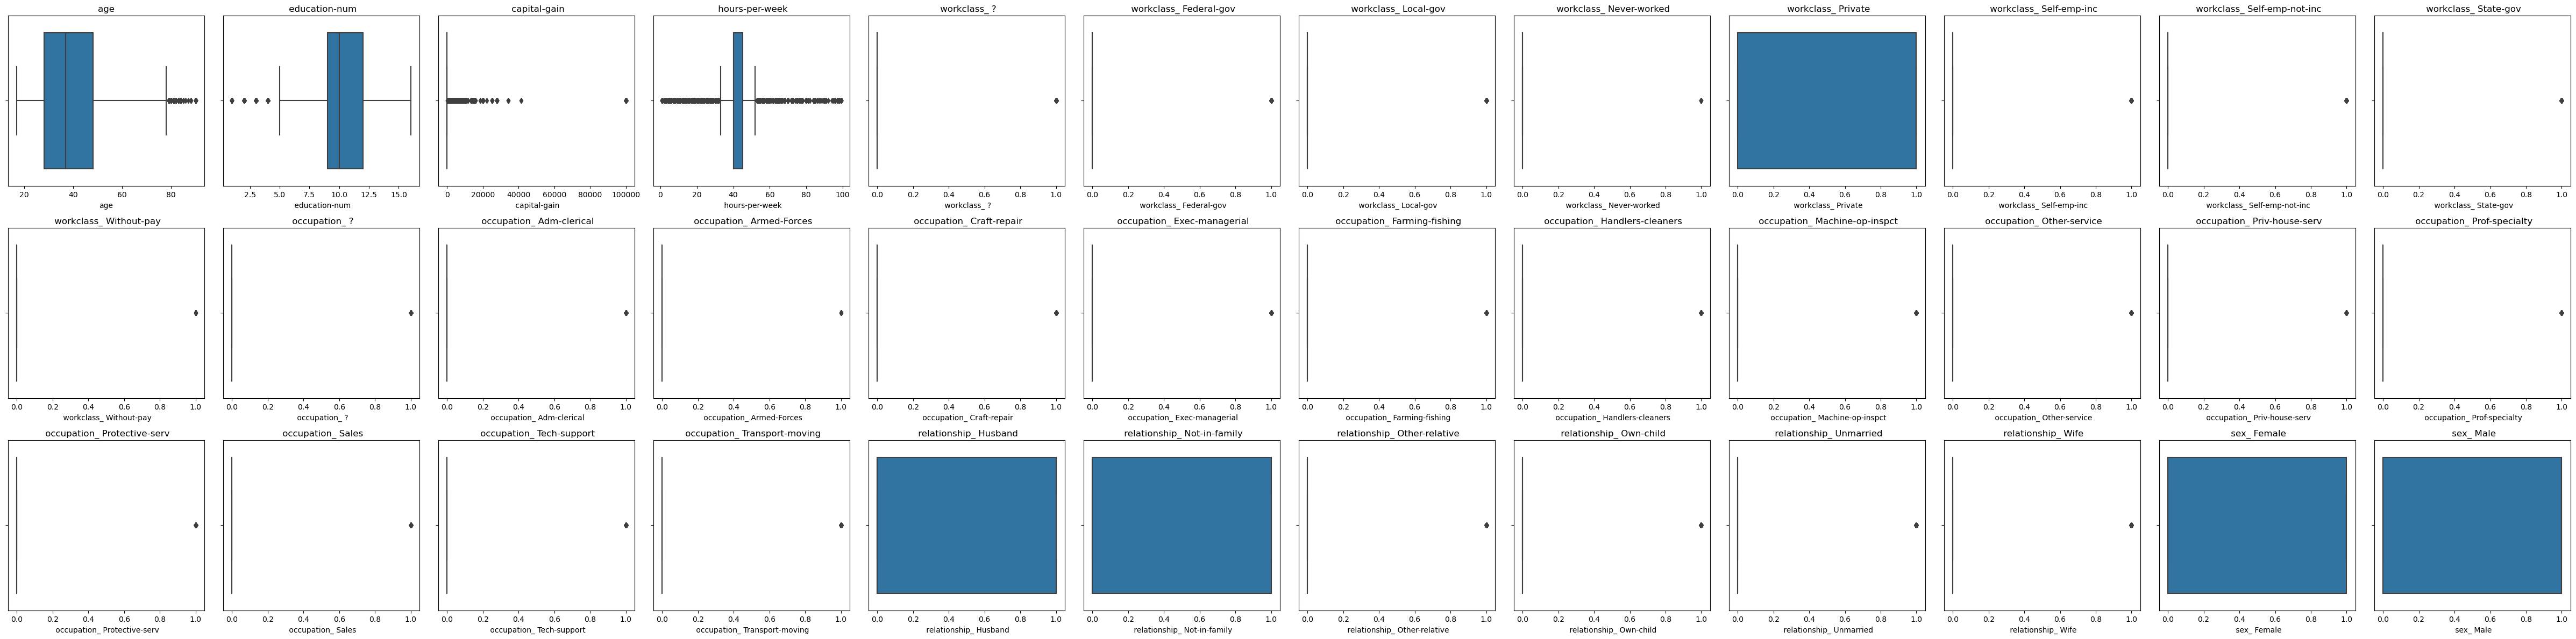

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = train.select_dtypes(include='number').columns


num_cols = len(numeric_columns)
rows = min(3, num_cols)
cols = (num_cols + rows - 1) // rows  


plt.figure(figsize=(cols * 4, rows * 4))
for i, column in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

            

In [27]:
import numpy as np


def outlier_detection(cols):
    Q1, Q3 = np.percentile(cols, [25, 75])
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    return upper_bound, lower_bound


numeric_columns = train.select_dtypes(include=np.number).columns


for column in numeric_columns:
    upper_bound, lower_bound = outlier_detection(train[column])
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
    train = train.drop(outliers.index, axis=0)




In [28]:
train.drop(' workclass_ ?', axis=1, inplace=True)


In [29]:
train.head(3)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
13,32,12,Never-married,0,50,United-States,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18,38,7,Married-civ-spouse,0,50,United-States,<=50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1
38,31,10,Married-civ-spouse,0,38,?,>50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
train.drop(' relationship_ Husband', axis=1, inplace=True)


In [31]:
train.drop(' sex_ Female', axis=1, inplace=True)


In [32]:
train.head(3)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,32,12,Never-married,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,1
18,38,7,Married-civ-spouse,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1
38,31,10,Married-civ-spouse,0,38,?,>50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [33]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler oluşturma
scaler = MinMaxScaler()

# Ölçeklendirilecek sütunları seçme (sadece sayısal sütunlar)
numeric_columns = train.select_dtypes(include=np.number).columns
columns_to_scale = ["age", "education-num", "capital-gain", "hours-per-week"]
columns_to_scale = list(set(columns_to_scale) & set(numeric_columns))  # Sayısal sütunları filtrele

# Seçilen sayısal sütunları ölçeklendirme
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])




In [34]:
train.head(2)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,0.240741,12,Never-married,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,1
18,0.351852,7,Married-civ-spouse,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [35]:
train.nunique()

age                               53
 education-num                    12
 marital-status                    6
 capital-gain                      1
 hours-per-week                   20
 native-country                   30
 income                            2
 workclass_ Federal-gov            1
 workclass_ Local-gov              1
 workclass_ Never-worked           1
 workclass_ Private                1
 workclass_ Self-emp-inc           1
 workclass_ Self-emp-not-inc       1
 workclass_ State-gov              1
 workclass_ Without-pay            1
 occupation_ ?                     1
 occupation_ Adm-clerical          1
 occupation_ Armed-Forces          1
 occupation_ Craft-repair          1
 occupation_ Exec-managerial       1
 occupation_ Farming-fishing       1
 occupation_ Handlers-cleaners     1
 occupation_ Machine-op-inspct     1
 occupation_ Other-service         1
 occupation_ Priv-house-serv       1
 occupation_ Prof-specialty        2
 occupation_ Protective-serv       1
 

In [36]:
train.head(3)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,0.240741,12,Never-married,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,1
18,0.351852,7,Married-civ-spouse,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1
38,0.222222,10,Married-civ-spouse,0,38,?,>50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [37]:
train.head(3)


,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,0.240741,12,Never-married,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,1
18,0.351852,7,Married-civ-spouse,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1
38,0.222222,10,Married-civ-spouse,0,38,?,>50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [38]:
train.nunique()

age                               53
 education-num                    12
 marital-status                    6
 capital-gain                      1
 hours-per-week                   20
 native-country                   30
 income                            2
 workclass_ Federal-gov            1
 workclass_ Local-gov              1
 workclass_ Never-worked           1
 workclass_ Private                1
 workclass_ Self-emp-inc           1
 workclass_ Self-emp-not-inc       1
 workclass_ State-gov              1
 workclass_ Without-pay            1
 occupation_ ?                     1
 occupation_ Adm-clerical          1
 occupation_ Armed-Forces          1
 occupation_ Craft-repair          1
 occupation_ Exec-managerial       1
 occupation_ Farming-fishing       1
 occupation_ Handlers-cleaners     1
 occupation_ Machine-op-inspct     1
 occupation_ Other-service         1
 occupation_ Priv-house-serv       1
 occupation_ Prof-specialty        2
 occupation_ Protective-serv       1
 

In [39]:
train.head(3)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,0.240741,12,Never-married,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,1
18,0.351852,7,Married-civ-spouse,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1
38,0.222222,10,Married-civ-spouse,0,38,?,>50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [40]:
train.head(3)

,age,education-num,marital-status,capital-gain,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,0.240741,12,Never-married,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,1,0,0,0,0,1
18,0.351852,7,Married-civ-spouse,0,50,United-States,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1
38,0.222222,10,Married-civ-spouse,0,38,?,>50K,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [41]:
train.nunique()

age                               53
 education-num                    12
 marital-status                    6
 capital-gain                      1
 hours-per-week                   20
 native-country                   30
 income                            2
 workclass_ Federal-gov            1
 workclass_ Local-gov              1
 workclass_ Never-worked           1
 workclass_ Private                1
 workclass_ Self-emp-inc           1
 workclass_ Self-emp-not-inc       1
 workclass_ State-gov              1
 workclass_ Without-pay            1
 occupation_ ?                     1
 occupation_ Adm-clerical          1
 occupation_ Armed-Forces          1
 occupation_ Craft-repair          1
 occupation_ Exec-managerial       1
 occupation_ Farming-fishing       1
 occupation_ Handlers-cleaners     1
 occupation_ Machine-op-inspct     1
 occupation_ Other-service         1
 occupation_ Priv-house-serv       1
 occupation_ Prof-specialty        2
 occupation_ Protective-serv       1
 

In [67]:
train.drop(' income', axis=1, inplace=True)

In [49]:
train.head(10)


,age,education-num,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,0.240741,12,50,<=50K,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
18,0.351852,7,50,<=50K,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
38,0.222222,10,38,>50K,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
49,0.185185,11,43,<=50K,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
63,0.425926,16,45,>50K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
83,0.740741,9,48,<=50K,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
87,0.259259,14,50,<=50K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
88,0.203704,5,40,<=50K,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
90,0.703704,11,40,<=50K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
97,0.333333,10,48,>50K,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [44]:
train.head(3)


,age,education-num,marital-status,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male
13,0.240741,12,Never-married,50,United-States,<=50K,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
18,0.351852,7,Married-civ-spouse,50,United-States,<=50K,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
38,0.222222,10,Married-civ-spouse,38,?,>50K,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [68]:
train.head(3)

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income
13,0.240741,12,50,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
18,0.351852,7,50,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
38,0.222222,10,38,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [59]:
train[' income'].value_counts()





 <=50K    955
 >50K     863
Name:  income, dtype: int64

In [69]:
train.head(3)

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income
13,0.240741,12,50,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
18,0.351852,7,50,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
38,0.222222,10,38,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = [" education-num", " hours-per-week"]
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])


In [72]:
###Logistic Regression


,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,income
13,0.240741,0.636364,0.894737,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
18,0.351852,0.181818,0.894737,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
38,0.222222,0.454545,0.263158,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [73]:
from sklearn.model_selection import train_test_split


In [76]:
X = train.drop("income", axis=1) 
y = train["income"] 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

In [80]:
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
y_train_pred = model.predict(X_train)

In [83]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("acuraccy for prediction:", train_accuracy)

acuraccy for prediction: 0.6987620357634112


In [84]:
y_test_pred = model.predict(X_test)

In [85]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("accuracy for testing:", test_accuracy)


accuracy for testing: 0.7115384615384616


In [86]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       193
           1       0.69      0.71      0.70       171

    accuracy                           0.71       364
   macro avg       0.71      0.71      0.71       364
weighted avg       0.71      0.71      0.71       364



In [92]:
print("ConfusionMatrix:")
print(confusion_matrix(y_test, y_test_pred))
predictions = model.predict(X_test)

ConfusionMatrix:
[[137  56]
 [ 49 122]]


In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve #https://scikit-learn.org/stable/modules/model_evaluation.html -> for acc metrics
roc_auc_score(y_test,predictions)

0.7116474259915765

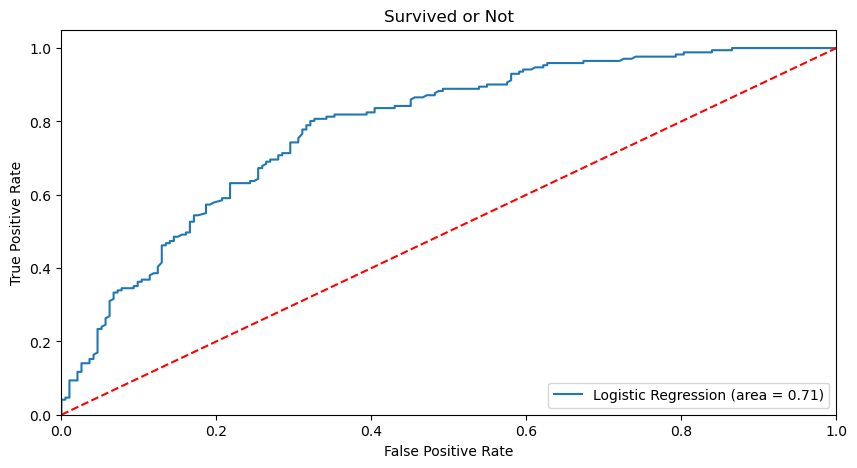

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [97]:
#Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [100]:
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [101]:
predicted = NBmodel.predict(X_test)

In [102]:
predicted

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [103]:
#Evaluatin of Naive Bayes

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [105]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [106]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )

Confusion Matrix for Naive Bayes:
 [[136  57]
 [ 55 116]]


In [107]:
print('Accuracy Score for Naive Bayes:',score2 )

Accuracy Score for Naive Bayes: 0.6923076923076923


In [108]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.71      0.70      0.71       193
           1       0.67      0.68      0.67       171

    accuracy                           0.69       364
   macro avg       0.69      0.69      0.69       364
weighted avg       0.69      0.69      0.69       364



In [109]:
print('Auc Score for Naive Bayes:',auc2 )

Auc Score for Naive Bayes: 0.6915128927673242


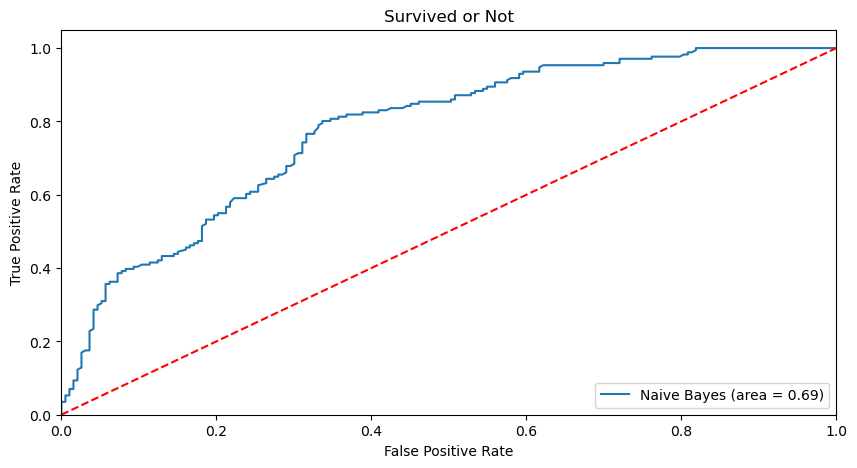

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [111]:
#SVM

In [112]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [113]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [114]:
y_test

31694    0
17017    1
2194     0
6678     0
9985     0
        ..
8879     1
12485    0
7104     1
30339    1
2780     0
Name: income, Length: 364, dtype: int32

In [115]:
#Evaluation of SVM

In [116]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6978021978021978


In [117]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.672316384180791
Recall: 0.695906432748538


In [118]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       193
           1       0.67      0.70      0.68       171

    accuracy                           0.70       364
   macro avg       0.70      0.70      0.70       364
weighted avg       0.70      0.70      0.70       364



In [119]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

In [120]:
print('Confusion Matrix for SVM:''\n',cm3 )

Confusion Matrix for SVM:
 [[135  58]
 [ 52 119]]


In [121]:
print('Accuracy Score for SVM:',score3 )

Accuracy Score for SVM: 0.6978021978021978


In [122]:
print('Auc Score for svm:',auc3 )

Auc Score for svm: 0.6976941490167561


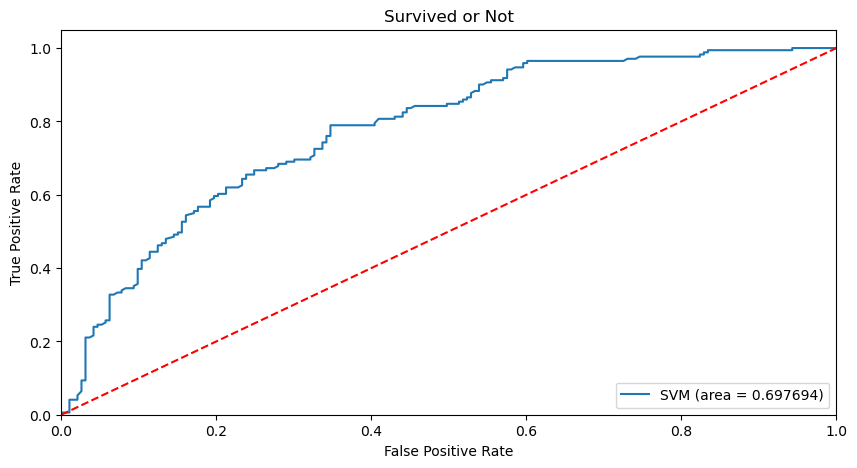

In [123]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [124]:
#Decision Tree

In [125]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [126]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [127]:
#Evaluation of Desicion Tree

In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6483516483516484


In [129]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.65      0.75      0.69       193
           1       0.65      0.54      0.59       171

    accuracy                           0.65       364
   macro avg       0.65      0.64      0.64       364
weighted avg       0.65      0.65      0.64       364



In [130]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6510989010989011


In [131]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69       193
           1       0.65      0.56      0.60       171

    accuracy                           0.65       364
   macro avg       0.65      0.65      0.65       364
weighted avg       0.65      0.65      0.65       364



In [132]:
#Random Forest

In [133]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
# Train the model on training data
rf.fit(X_train,y_train);

In [134]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

In [135]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [136]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       193
           1       0.68      0.64      0.66       171

    accuracy                           0.69       364
   macro avg       0.69      0.69      0.69       364
weighted avg       0.69      0.69      0.69       364



In [137]:
#KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [139]:
y_pred = classifier.predict(X_test)

In [140]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[146  47]
 [ 55 116]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       193
           1       0.71      0.68      0.69       171

    accuracy                           0.72       364
   macro avg       0.72      0.72      0.72       364
weighted avg       0.72      0.72      0.72       364



In [141]:
#Model selection

In [142]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

In [ ]:
print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())